In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import SVG
from  graphviz import Source
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from IPython.display import HTML
style = '<style>svg{width:70% !important;height:70% !important;}</style>'

HTML(style)


sns.set(rc={'figure.figsize':(15,6)})

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score,roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder

In [2]:
heart_data=pd.read_csv('data\heart.csv')
mushrooms_data=pd.read_csv('training_mush.csv')
mushrooms_data_test=pd.read_csv('testing_mush.csv')
mushrooms_data_test_y=pd.read_csv('testing_y_mush.csv')
invasion_data=pd.read_csv('data\invasion.csv')
invasion_data_test=pd.read_csv('data\operative_information.csv')
 
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Датасет mushrooms

In [3]:
y=heart_data['target']
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
X=heart_data.iloc[:,:-1]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf_rf=RandomForestClassifier()
parametrs={'n_estimators':[2,3, 4, 5,8, 10, 15, 20, 25, 30], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9 , 10]}
grid_search_cv_clf= GridSearchCV(clf_rf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train )
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [7]:
best_clf=grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)

0.83

In [8]:
feature_importances=best_clf.feature_importances_
feature_importances_df=pd.DataFrame({
    'features': list(X_train),
    'feature_importances': feature_importances
})

In [9]:
# Вот тут набор фичей, по которым мы делали сплиты в целях максимального снижения энтропии в данных
feature_importances_df.sort_values('feature_importances', ascending=False )

,features,feature_importances
2,cp,0.188957
11,ca,0.152404
12,thal,0.102491
8,exang,0.089971
7,thalach,0.088762
9,oldpeak,0.081341
10,slope,0.076700
0,age,0.055762
3,trestbps,0.051036
4,chol,0.048558


Выше построен случайный лес. Здесь выполняется само задание

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте


<AxesSubplot:>

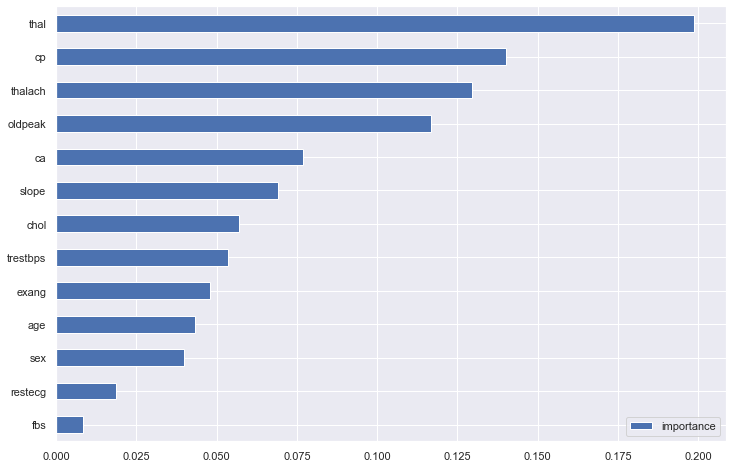

In [10]:
# По-хорошему тут надо фититься на X_train, y_train
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)
rf.fit(X, y)
#Код для отрисовки важности фичей

imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))


### Forrest with MushRooms
https://stepik.org/lesson/209697/step/3?unit=183201

Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

RandomForestClassifier(random_state=0)
Параметры для выбора -

n_estimators: от 10 до 50 с шагом 10

max_depth: от 1 до 12 с шагом 2

min_samples_leaf: от 1 до 7

min_samples_split: от 2 до 9 с шагом 2

Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?



In [11]:
mushrooms_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [12]:
mushrooms_data.shape

(6093, 23)

In [13]:
y=mushrooms_data['class']
y.value_counts()

0    3153
1    2940
Name: class, dtype: int64

In [14]:
X=mushrooms_data.iloc[:,:-1]
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,0,3,1,5,1,0,0,9,1,...,2,3,7,0,2,1,4,3,5,0
1,2,0,4,0,5,1,0,1,10,0,...,3,7,4,0,2,1,0,7,4,0
2,2,0,3,0,2,1,0,0,7,0,...,1,0,4,0,2,1,2,1,5,1
3,0,0,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1
4,2,3,3,1,5,1,0,0,10,1,...,2,3,6,0,2,1,4,2,5,0


In [15]:
X_train=X
y_train=y
print(X_train.shape, y_train.shape)

(6093, 22) (6093,)


In [16]:
%%time
clf_rf=RandomForestClassifier(random_state=0)
parametrs={'n_estimators':range(10,51,10),'max_depth':range(1,13,2),'min_samples_leaf':range(1,8),'min_samples_split':range(2,9,2)}
grid_search_cv_clf= GridSearchCV(clf_rf, parametrs, cv=3,  n_jobs=-1)
grid_search_cv_clf.fit(X_train, y_train )

Wall time: 44.1 s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 51, 10)})

In [17]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [18]:
%%time
best_clf=grid_search_cv_clf.best_estimator_
feature_importances=best_clf.feature_importances_
feature_importances_df=pd.DataFrame({
    'features': list(X_train),
    'feature_importances': feature_importances
})
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
feature_importances_df.sort_values('feature_importances', ascending=False )

Wall time: 5.98 ms


,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


<AxesSubplot:>

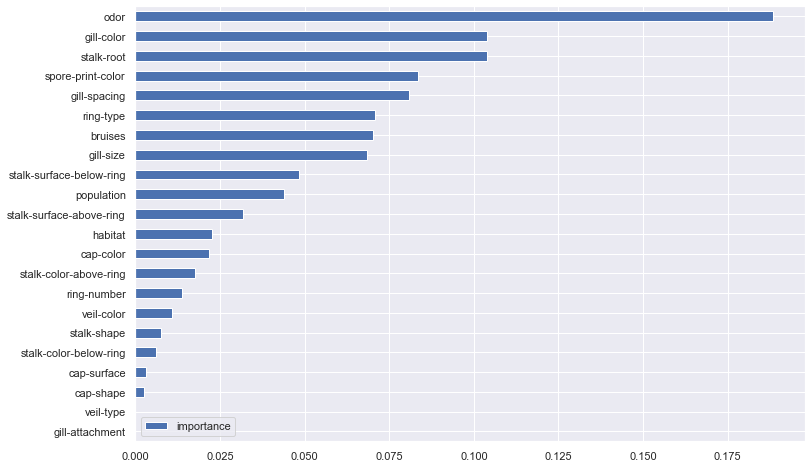

In [19]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))


Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

 

Заметьте, что для использования этого леса на новых грибах, нам нужно будет заполнить значения параметров гриба, часть из которых определить проще (например, цвет шляпки), а для определения части понадобится специалист-миколог.
То есть в этом случае нам придётся самим экстрагировать признаки из объекта. Для зрительных признаков типа формы, цвета можно использовать более сложную модель (например, свёрточную нейронную сеть) и подавать на вход фотки гриба. И модель сама извлечёт признаки вместо того, чтобы нам описывать самим. Но одной фоткой тут не отделаешься - для определения запаха понадобится ещё детектор



In [20]:
print(mushrooms_data_test.shape)
mushrooms_data_test.head()

(2031, 22)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [21]:
X_test=mushrooms_data_test
y_pred= best_clf.predict(X_test)

In [22]:
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [23]:
type(y_pred)

numpy.ndarray

In [24]:
sum(y_pred)

976

In [25]:
pd.Series(y_pred).value_counts()

0    1055
1     976
dtype: int64

Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам, (воспользуйтесь паролем из предыдущего задания, чтобы открыть их). Выберите из предложенных вариантов правильный



In [26]:
y_true=mushrooms_data_test_y
confusion_matrix(y_true, y_pred)

array([[1055,    0],
       [   0,  976]], dtype=int64)

### invasion dataset
https://stepik.org/lesson/209697/step/7?unit=183201
На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

In [27]:
invasion_data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [28]:
X_train=invasion_data.iloc[:,1:]

#### Несколько способов заменить классы на цифры
###### 1) Использование словаря + функции map

In [29]:
transport_type = {'transport' :  0,  'fighter' :  1,  'cruiser' : 2}
y_train1 = invasion_data['class'].map(transport_type)
y_train1.head()

0    0
1    0
2    0
3    1
4    1
Name: class, dtype: int64

##### 2) Функция factorize 

In [30]:
factors = pd.factorize(invasion_data['class'])
y_train2=pd.Series(factors[0])
y_train2.head()

0    0
1    0
2    0
3    1
4    1
dtype: int64

In [31]:
invasion_data.shape

(500, 7)

##### 3) LabelEncoder

In [32]:
from sklearn.preprocessing import LabelEncoder
#le_class = preprocessing.LabelEncoder()
le_class = LabelEncoder()

le_class.fit(invasion_data['class'])
LabelEncoder()
list(le_class.classes_)

['cruiser', 'fighter', 'transport']

In [33]:
'''le_class.transform(['fighter','fighter','fighter','fighter','cruiser'])'''
# этот код выведет
# array([1, 1, 1, 1, 0])
# list(le_class.inverse_transform([2, 2, 1])) 
# сделает перевод обратно
# ['transport', 'transport', 'fighter']

"le_class.transform(['fighter','fighter','fighter','fighter','cruiser'])"

In [34]:
y_train=le_class.transform(invasion_data['class'])
y_train=pd.Series(y_train)
y_train.head()

0    2
1    2
2    2
3    1
4    1
dtype: int32

In [35]:
X_test=invasion_data_test
X_test.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [36]:
# не забыть на этом шаге поэксперементировать с числом cv
clf_rf=RandomForestClassifier()
parametrs={'n_estimators':[2,3, 4, 5,8, 10, 15, 20, 25, 30], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9 , 10]}
grid_search_cv_clf= GridSearchCV(clf_rf, parametrs, cv=4)
grid_search_cv_clf.fit(X_train, y_train )
grid_search_cv_clf.best_params_

{'max_depth': 2, 'n_estimators': 3}

In [37]:
best_clf=grid_search_cv_clf.best_estimator_
feature_importances=best_clf.feature_importances_
feature_importances_df=pd.DataFrame({
    'features': list(X_train),
    'feature_importances': feature_importances
})
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
feature_importances_df.sort_values('feature_importances', ascending=False )

,features,feature_importances
3,brightness,0.278394
1,i_reflection,0.276604
0,g_reflection,0.199511
2,speed,0.128802
5,volume,0.116689
4,time_of_observance,0.000000


In [38]:
y_pred=best_clf.predict(X_test)

In [39]:
pd.Series(y_pred).value_counts()

1    675
2    612
0    213
dtype: int64

In [40]:
pd.Series(list(le_class.inverse_transform(y_pred))).value_counts()

fighter      675
transport    612
cruiser      213
dtype: int64